#Personal face recognition using SVM

## Install open CV

 OpenCV is a library of programming functions mainly for real-time computer vision. We need to install this to handle loading and pre-processing of images

In [95]:
pip install numpy opencv-python scikit-learn

## Import Libraries

In [96]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

For this example, the dataset is located in google drive. We need to mount it to our colab notebook so that we can use the images inside

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display an image to test if the mount is successful

To check if there are images in the google drive, let us display one image from our training set

In [98]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

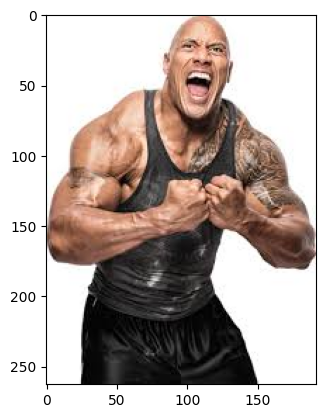

In [100]:
displayImage('/content/drive/My Drive/Images/Train/Dwayne Johnson/r5.jpeg')

## Create a function to load your images from your google drive folder

In [101]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

Call the function

In [102]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

Our training set consists of 10 images with 10000 features each

In [103]:
images.shape

(10, 10000)

In [104]:
labels.shape

(10,)

In [105]:
labels

array(['Dwayne Johnson', 'Dwayne Johnson', 'Dwayne Johnson',
       'Dwayne Johnson', 'Dwayne Johnson', 'Henry Cavill', 'Henry Cavill',
       'Henry Cavill', 'Henry Cavill', 'Henry Cavill'], dtype='<U14')

Display one image from our training set

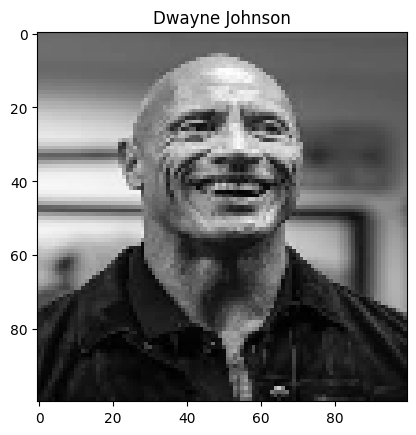

In [110]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

Display ten image from our training set

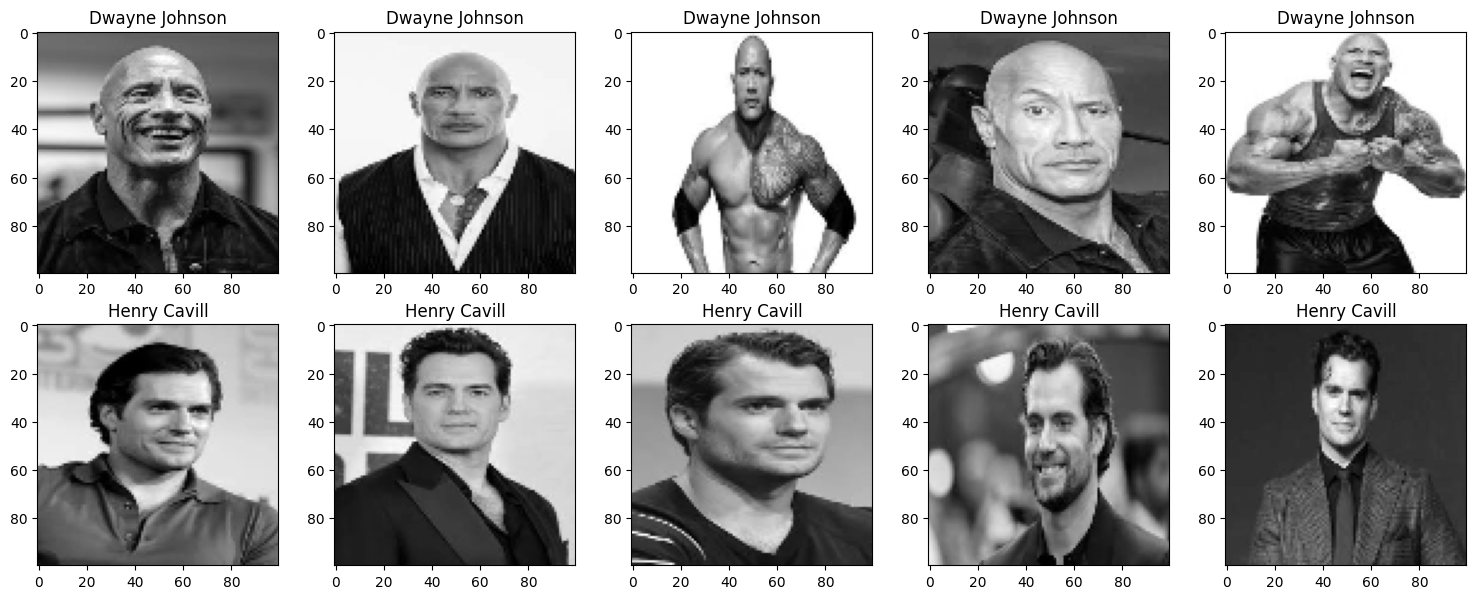

In [106]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split the data

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train a SVM model

In [112]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)


SVC()

## Evaluate the SVM model

In [113]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## Test your model using images that are not in the training data

Define a function to pass an image and do prediction

In [114]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Provide a test image from both classes

Predicted label: ['Henry Cavill']


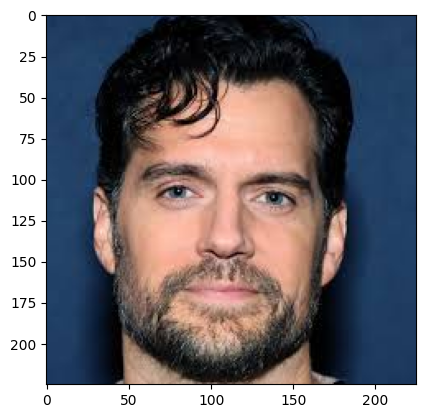

In [115]:
img_path = '/content/drive/My Drive/Images/Test/h6.jpeg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Henry Cavill']


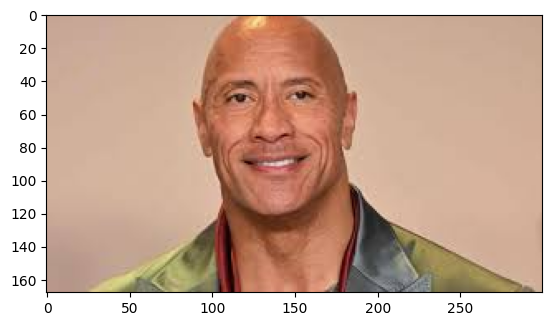

In [116]:
img_path = '/content/drive/My Drive/Images/Test/r6.jpeg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)